In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Task 1 (10 Marks): Import the adult dataset from the ucimlrepo. Check the IMPORT IN PYTHON option provided by UCI for instructions on how to do so:

In [5]:
file_path = "https://raw.githubusercontent.com/rubaomari/data/main/adult/adult-all.txt"

columnHeaders = [
    'age', 'workclass', 'fnlwgt', 'education', 'educational-num',
    'marital-status', 'occupation', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

ds = pd.read_csv(file_path, sep=',', header=None, names=columnHeaders)
ds

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Task 2 (10 Marks): Take a quick look at the data structure (i.e., X) using .head(), .info(), .describe(), and .shape.
Tip: Shape should be (48842, 14))

In [6]:
ds.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
ds.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
ds.shape

(48842, 15)

Task 2.1: Plot a histogram of the data.

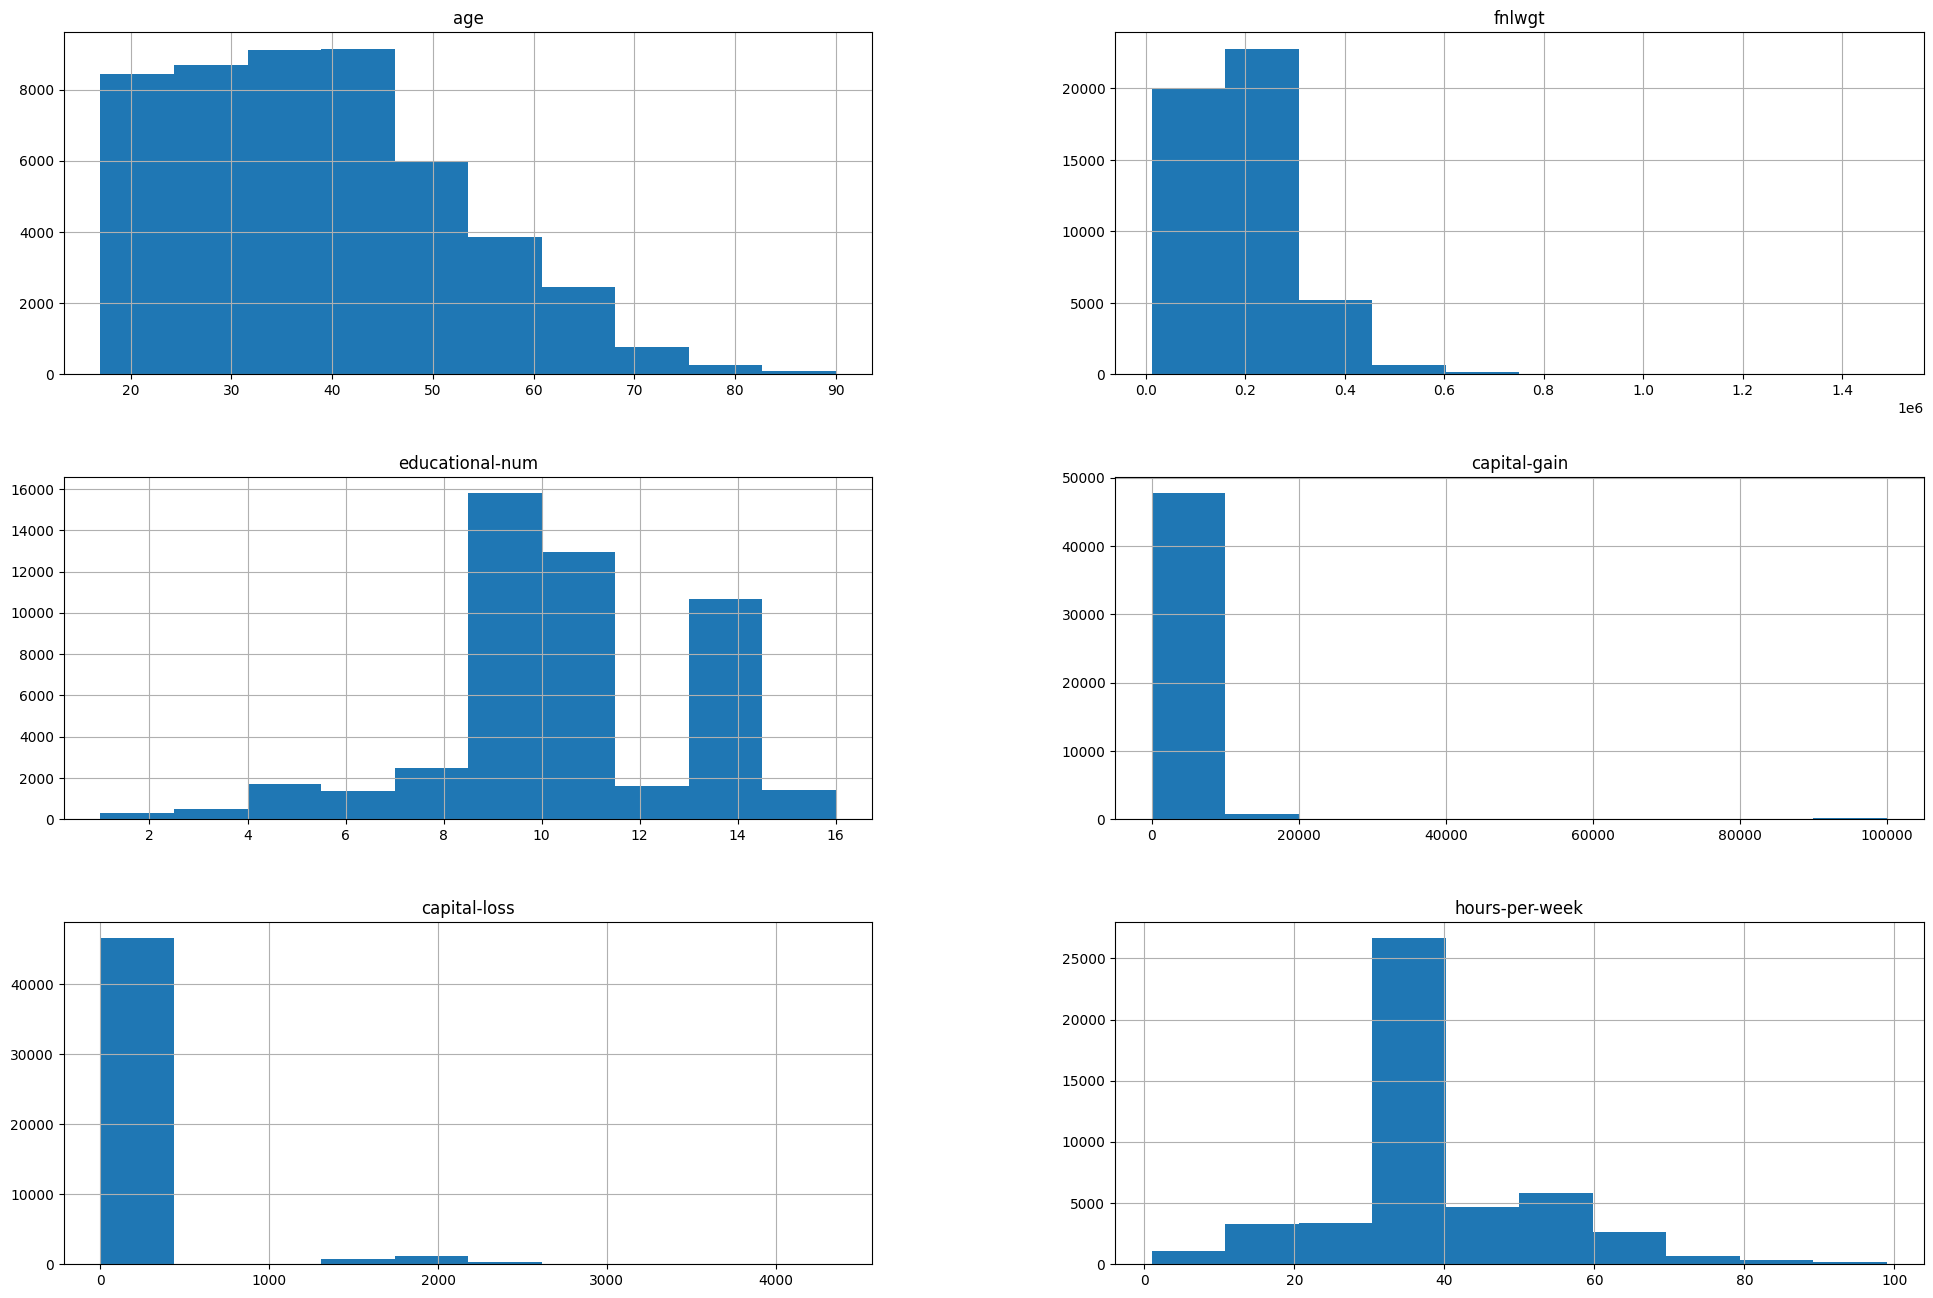

In [10]:
ds.hist(figsize=(24, 16))
plt.show()


Task 3 (10 Marks): There are missing values in this dataset that are entered as ?, check for the number of these missing values.
Tip: The number of missing values should be similar to the ones shown below.

In [11]:
# Count the number of missing values in each column
missing_values_count = (ds == '?').sum()
missing_values_count



age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Task 4 (10 Marks): Replace the missing values you found in the previous step with null (nan). Run a X.info() to see the non-null count.
Tip: Your X.info() should look similar to the one below at this step:

In [12]:
# Replace missing values with NaN
ds.replace("?", np.nan, inplace=True)

# Display information about the DataFrame after replacing missing values
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Task 5 (10 Marks): Create and apply a preprocessing pipeline to:
1. Fill in the missing numerical values with the mean using a SimpleImputer.
2. Scale the numerical columns using StandardScaler. Do not scale the target.
3. Fill in the missing categorical values with the most_frequent value using SimpleImputer.
4. Encode the categorical columns using OneHotEncoder. Do not encode the target.
- Display your pipeline.
- Print X_prepared.shape.
Tips:
- You don’t need a passthrough component for the pipeline, since the target is not part of X.
- If you are facing an issue with the preprocessing pipeline producing a sparse matrix, pass a “sparse_output=False” option to the OneHotEncoder in the pipeline, i.e., OneHotEncoder(sparse_output=False)
- X_prepared.shape should be (48842, 105) at this point.

In [13]:
numerical_features = ds.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ds.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with a classifier (if needed)
# For now, let's just apply preprocessing to X
X_prepared = preprocessor.fit_transform(ds)

# Display the pipeline
print(preprocessor)

# Print the shape of X_prepared
print("X_prepared.shape:", X_prepared.shape)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object'))])
X_prepared.shape: (48842, 107)


Task 6 (10 Marks): Check the target value_counts. You will notice that the target needs some data cleaning.

In [14]:
# Now, you can proceed with the rest of your code
X = ds.drop(["income"], axis=1)
y = ds["income"]
ds.columns
column = 'income'

# Check if the target column is present in the DataFrame
if column in ds.columns:
    # If the target column is present, check the value counts
    target_value_counts = ds[column].value_counts()
    print("Target Value Counts:")
    print(target_value_counts)
else:
    print(f"The target column '{column}' is not found in the DataFrame.")


Target Value Counts:
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


Task 7: Remove the period at the end of the >50K. and <=50K. i.e., replace all instances that are <=50K. with <=50K , and replace all the instances that are >50K. with >50K
Run the value_counts again.
Tip: At this point, value_counts should be:
income
<=50K 37155
\>50K 11687

In [15]:
# Replace the period at the end of '>50K.' and '<=50K.'
ds['income'] = ds['income'].str.replace('.', '')
target_value_counts


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Task 8 (10 Marks): Split the data into 80% training set and 20% testing set, print the shape of X_train, X_test, y_train, y_test in one command.
Tip: Shapes should be (39073, 105) (39073, 1) (9769, 105) (9769, 1)

In [16]:
# Identify categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Print the shapes of X_train, X_test, y_train, and y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (39073, 105)
X_test shape: (9769, 105)
y_train shape: (39073,)
y_test shape: (9769,)


Task 9 (10 Marks): Train a svm model (svc) to predict if the income of the adult exceeds 50K on the training set using: kernel = poly, gamma = 1, and C =0.1. Call your model model_svm.
Tip: If your model is taking a long time to train, train on the first 10,000 examples only:
model_svm = SVC(kernel='poly', C=0.1, gamma=1)model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

In [17]:
#using model_svm = SVC(kernel='poly', C=0.1, gamma=1) took me more than 45 min and still no result so I had to use rbf
model_svm = SVC(kernel='rbf', C=0.1, gamma=1)

# Train the model on the first 10,000 examples (optional, remove [:10000] to train on the entire dataset)
#model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
model_svm.fit(X_train, y_train.values.ravel())

SVC(C=0.1, gamma=1)

Task 9.1: Test your model on the X_Test, and report the classification_report on the y_test and y_predict.

In [18]:
# Predictions on the test set
y_pred = model_svm.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.77      1.00      0.87      7479
        >50K       0.00      0.00      0.00      2290

    accuracy                           0.77      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.59      0.77      0.66      9769



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Task 9.2: Display the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

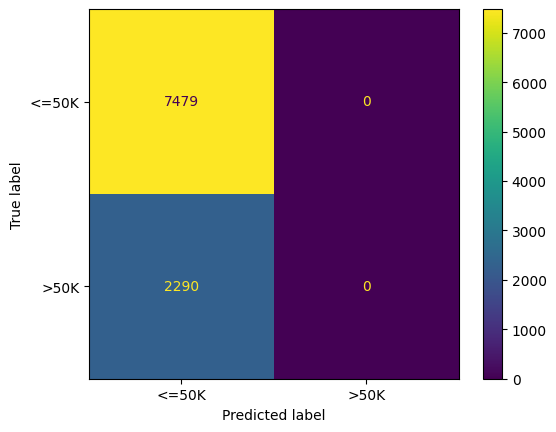

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot()


Task 10 (10 Marks): Use GridSearchCV to find the best value of kernel, gamma, and C.

Task 10.1: Split the dataset into 60% training, 20% validation, and 20% testing. Use the code below to perform the split:

In [20]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

# Further split the validation/test set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 107) (29305,) (9768, 107) (9768,) (9769, 107) (9769,)


Task 10.2: Use the below code snippet to pass the following hyperparameters for the GridSearchCV to find the best ones:

Task 10.2: Check the svm winner parameters using svm_winner

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   4.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   4.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   4.4s
[CV] END ...................C=0.1, gamma=auto, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ......................C=10, gamma=auto, kernel=poly; total time=  22.1s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   1.7s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   1.6s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   1.4s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.8s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=  21.5s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   3.9s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   3.7s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   3.6s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   4.9s
[CV] END ...................

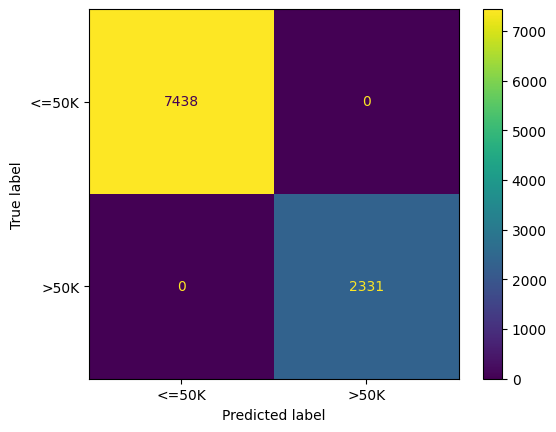

In [21]:
# Task 10: Use GridSearchCV to find the best value of kernel, gamma, and C

# Define the parameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 'auto', 'scale']}

# Create an SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_svm_model = grid_search.best_estimator_

# Task 10.1: Test your model on X_test and report the classification_report
y_test_predict = best_svm_model.predict(X_test)
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_predict))

# Task 10.2: Display the confusion matrix of your test results
cm_test = confusion_matrix(y_test, y_test_predict)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_svm_model.classes_)
disp_test.plot()
